# Comma AI Challenge
## Hemanth Chittanuru

In [55]:
!pip install opencv-python matplotlib torch torchvision

     |████████████████████████████████| 387 kB 4.1 MB/s eta 0:00:01


In [64]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
from comma_pytorch import CommaDataset, CommaModel

In [3]:
train_video_path = "data/train.mp4"
train_labels = "data/train.txt"
test_video_path = "data/test.mp4"
frame_rate = 20
train_img_dir = "train/"
test_img_dir = "test/"

## Data Loading

### Splitting up the training video into images

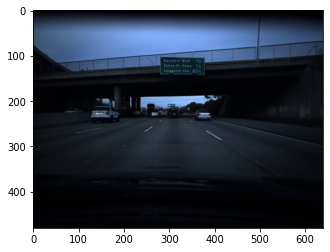

In [4]:
if not os.path.exists(train_img_dir):
    os.makedirs(train_img_dir)
    train_cap = cv2.VideoCapture(train_video_path)
    success, frame = train_cap.read()
    counter = 0
    while success:
        fileName = train_img_dir + "frame" + str(counter) + ".jpg"
        counter += 1
        cv2.imwrite(fileName, frame)
        success, frame = train_cap.read()
    print("Done with creating " + str(counter) + " images")
img = plt.imread(train_img_dir + "frame0.jpg")
plt.imshow(img)

### Splitting up the test video into images

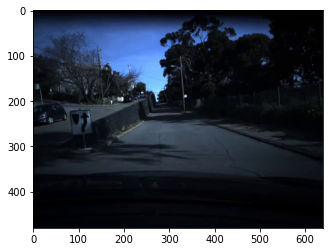

In [5]:
if not os.path.exists(test_img_dir):
    os.makedirs(test_img_dir)
    test_cap = cv2.VideoCapture(test_video_path)
    success, frame = test_cap.read()
    counter = 0
    while success:
        fileName = test_img_dir + "frame" + str(counter) + ".jpg"
        counter += 1
        cv2.imwrite(fileName, frame)
        success, frame = test_cap.read()
    print("Done with creating " + str(counter) + " images")
img = plt.imread(test_img_dir + "frame0.jpg")
plt.imshow(img)

### Loading speeds of training video

In [59]:
speed_file = open(train_labels, "r")
train_speeds = []
contents = speed_file.read()
contents = list(map(float, contents.split("\n")))
print(contents[:5])

[28.105569, 28.105569, 28.106527, 28.130404, 28.109243]


## Optical Flow

In [19]:
def compute_optical_flow(file1, file2):
    image1 = cv2.imread(file1)
    flow_image = np.zeros_like(image1)
    image2 = cv2.imread(file2)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    flow_image[:, :, 1] = 255
    flow = cv2.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1])
    flow_image[:,:,0] = ang * 180/np.pi/2
    flow_image[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    flow_image = cv2.cvtColor(flow_image, cv2.COLOR_HSV2BGR)
    return flow_image

### Example of optical flow

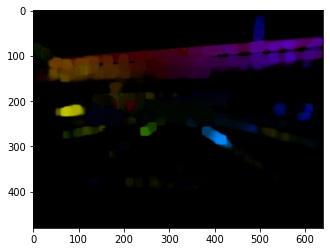

In [20]:
flow_image = compute_optical_flow("train/frame0.jpg", "train/frame1.jpg")
plt.imshow(flow_image)

## Training

In [54]:
all_indices = np.array(range(0, 20398))
np.random.shuffle(all_indices)
train_percent = 0.8
training_samples = int(train_percent * len(all_indices))
val_indices, x, train_indices = np.split(all_indices, [len(all_indices) - training_samples, training_samples])
train_indices = np.concatenate([train_indices, x])
train_indices.shape, val_indices.shape

((16318,), (4080,))

In [68]:
train_dataset = CommaDataset(train_indices, contents)
val_dataset = CommaDataset(val_indices, contents)
model = CommaModel()
model.forward(train_dataset[0])

AttributeError: cannot assign module before Module.__init__() call